In [1]:
library(loadeR)
library(visualizeR)
library(sp)

Loading required package: rJava



Loading required package: loadeR.java



Java version 11x amd64 by Oracle Corporation detected



NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



Loading required package: climate4R.UDG



climate4R.UDG version 0.2.3 (2021-07-05) is loaded



Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>



Please use 'citation("climate4R.UDG")' to cite this package.



loadeR version 1.7.1 (2021-07-05) is loaded



Get the latest stable version (1.8.1) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>



Please use 'citation("loadeR")' to cite this package.



Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded



Get the latest stable version (2.2.2) using <devtools::install_github('SantanderMetGroup/transformeR')>



Please see 'citation("transformeR")' to cite this package.



visualizeR version 1.6.1 (2021-03-11) is loaded



Get the latest stable version (1.6.4) using <devtools::install_github('SantanderMetGroup/visualizeR')>



Please see 'citation("visualizeR")' to cite this package.



In [2]:
source("../datasets-interactive-atlas/hatching-functions/hatching-functions.R")
source("../datasets-interactive-atlas/hatching-functions/AR6-WGI-hatching.R")

In [3]:
di <- dataInventory("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc")
str(di)

[2024-04-17 11:27:20] Doing inventory ...



[2024-04-17 11:27:21] Retrieving info for 'pr' (0 vars remaining)



[2024-04-17 11:27:21] Done.



List of 1
 $ pr:List of 7
  ..$ Description: chr "Precipitation"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:4] 51 33 69 50
  ..$ Units      : chr "mm"
  ..$ DataSizeMb : num 23.2
  ..$ Version    : logi NA
  ..$ Dimensions :List of 4
  .. ..$ member:List of 3
  .. .. ..$ Type  : chr "Ensemble"
  .. .. ..$ Units : chr ""
  .. .. ..$ Values: chr [1:33] "ACCESS-CM2_r1i1p1f1" "ACCESS-ESM1-5_r1i1p1f1" "BCC-CSM2-MR_r1i1p1f1" "CAMS-CSM1-0_r2i1p1f1" ...
  .. ..$ time  :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "365.24 days"
  .. .. ..$ Units     : chr "days since 1850-06-01 12:00:00 GMT"
  .. .. ..$ Date_range: chr "1850-06-01T12:00:00Z - 1900-06-01T12:00:00Z"
  .. ..$ lat   :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:69] -56.5 -55.5 -54.5 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 ...
  .. .. ..$ Shape      : int 69
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon   :List 

In [4]:
ref <- loadGridData("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc", var = "pr")
delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_delta.nc", var = "pr")

[2024-04-17 11:27:21] Defining geo-location parameters



[2024-04-17 11:27:21] Defining time selection parameters



[2024-04-17 11:27:21] Retrieving data subset ...



[2024-04-17 11:27:24] Done



[2024-04-17 11:27:24] Defining geo-location parameters



[2024-04-17 11:27:24] Defining time selection parameters



[2024-04-17 11:27:24] Retrieving data subset ...



[2024-04-17 11:27:24] Done



In [5]:
pl.simple.sam <- AR6.WGI.hatching(delta = delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG")


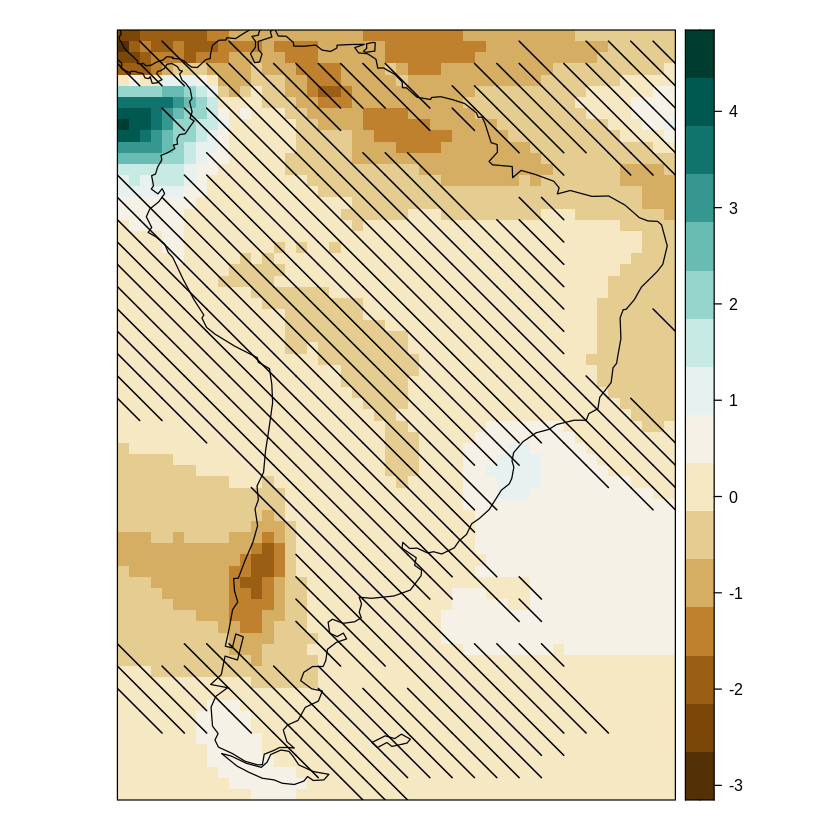

In [6]:
pl.simple.sam

In [7]:
rel.delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_relative_delta.nc", var = "pr")
pl.simple.sam <- AR6.WGI.hatching(delta = delta, relative.delta = rel.delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)

[2024-04-17 11:27:25] Defining geo-location parameters



[2024-04-17 11:27:25] Defining time selection parameters



[2024-04-17 11:27:25] Retrieving data subset ...



[2024-04-17 11:27:25] Done



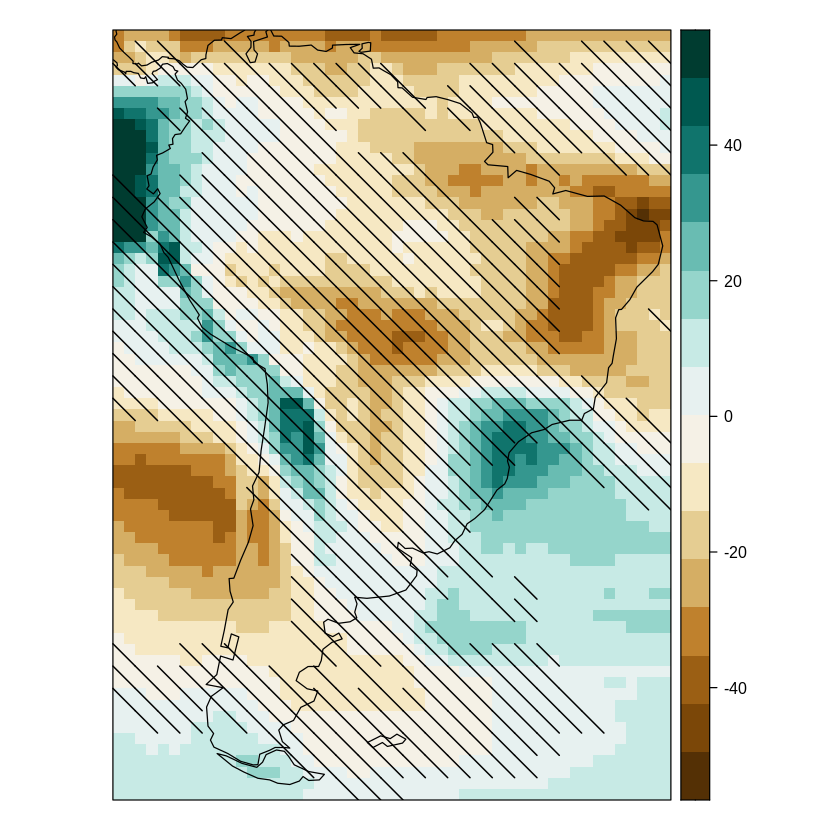

In [8]:
pl.simple.sam

In [9]:
pl.advanced.sam <- AR6.WGI.hatching(delta = delta, historical.ref = ref, relative.delta = rel.delta, method = "advanced", 
                                  map.hatching.args = list(density = 1, lwd = 0.7), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)

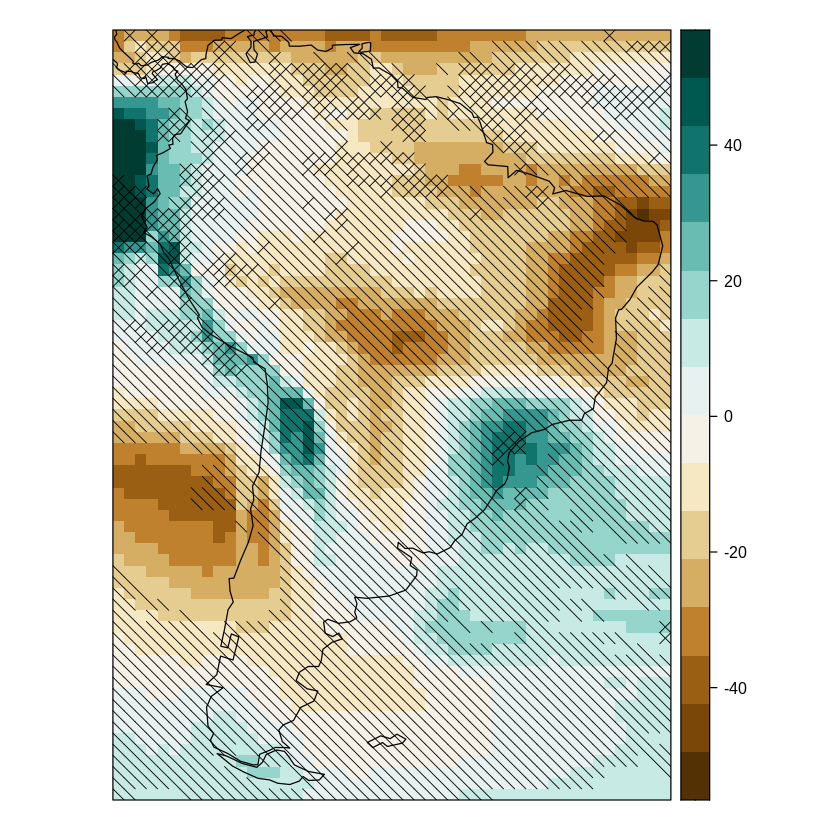

In [10]:
pl.advanced.sam

In [11]:
di <- dataInventory("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc")

[2024-04-17 11:27:31] Doing inventory ...



[2024-04-17 11:27:32] Retrieving info for 'pr' (0 vars remaining)



[2024-04-17 11:27:32] Done.



In [12]:
hist <- loadGridData("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc", var = "pr")
scen <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100.nc", var = "pr")

[2024-04-17 11:27:32] Defining geo-location parameters



[2024-04-17 11:27:32] Defining time selection parameters



[2024-04-17 11:27:32] Retrieving data subset ...



[2024-04-17 11:27:32] Done



[2024-04-17 11:27:32] Defining geo-location parameters



[2024-04-17 11:27:32] Defining time selection parameters



[2024-04-17 11:27:32] Retrieving data subset ...



[2024-04-17 11:27:32] Done



In [13]:
delta <- gridArithmetics(climatology(scen), climatology(hist), operator = "-")
ensemble.mean <- function(grid) aggregateGrid(grid, aggr.mem = list(FUN = mean, na.rm = T))
delta.ens <- ensemble.mean(delta)
hist.ens <- ensemble.mean(climatology(hist))
# Relative delta
rel.delta <- gridArithmetics(delta.ens, 
                             hist.ens, 
                             100, 
                             operator = c("/", "*"))

[2024-04-17 11:27:32] - Computing climatology...



[2024-04-17 11:27:42] - Done.



[2024-04-17 11:27:43] - Computing climatology...



[2024-04-17 11:27:54] - Done.



[2024-04-17 11:27:56] - Aggregating members...



[2024-04-17 11:27:56] - Done.



[2024-04-17 11:27:56] - Computing climatology...



[2024-04-17 11:28:08] - Done.



[2024-04-17 11:28:09] - Aggregating members...



[2024-04-17 11:28:09] - Done.



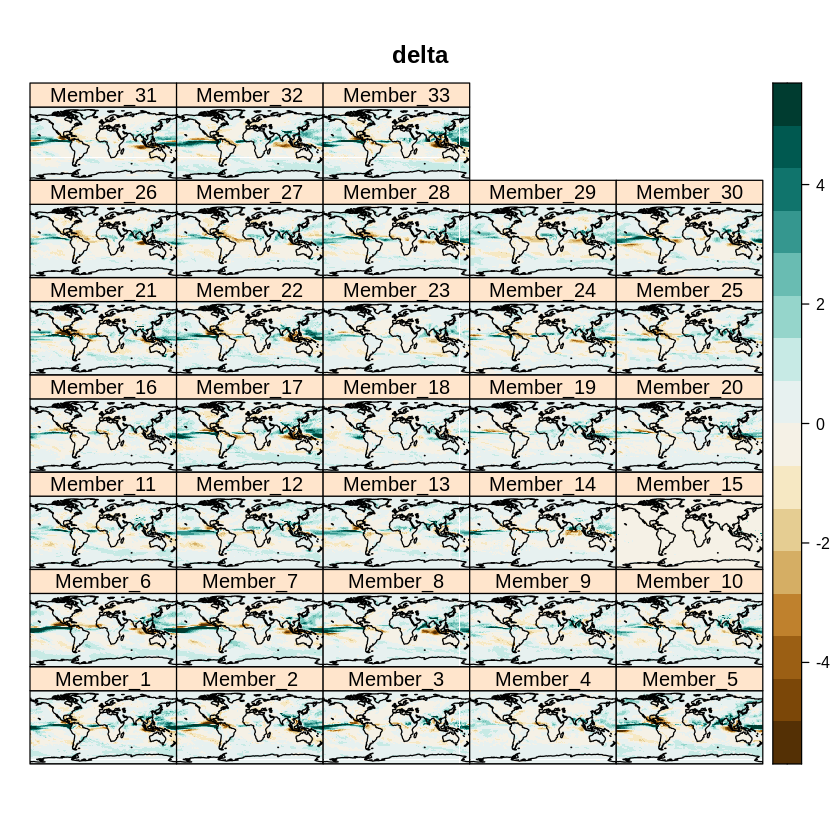

In [14]:
spatialPlot(delta, backdrop.theme = "coastline", main = "delta", 
           set.max = 5, set.min = -5, color.theme = "BrBG")

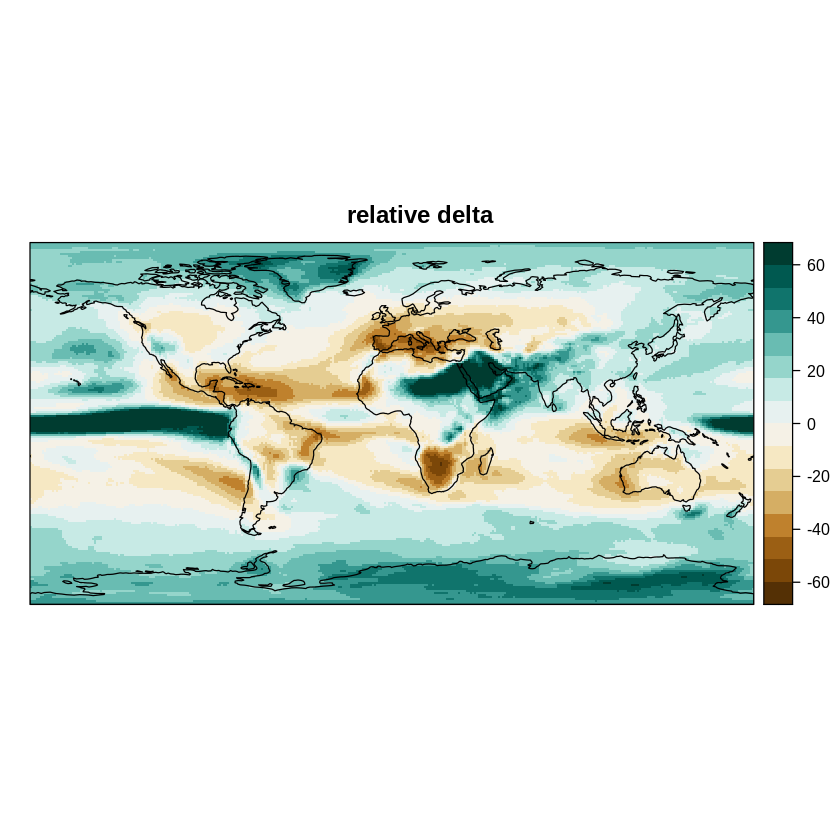

In [15]:
spatialPlot(rel.delta, backdrop.theme = "coastline", main = "relative delta", 
           set.max = 60, set.min = -60, color.theme = "BrBG")

[2024-04-17 11:28:21] - Aggregating members...



[2024-04-17 11:28:21] - Done.



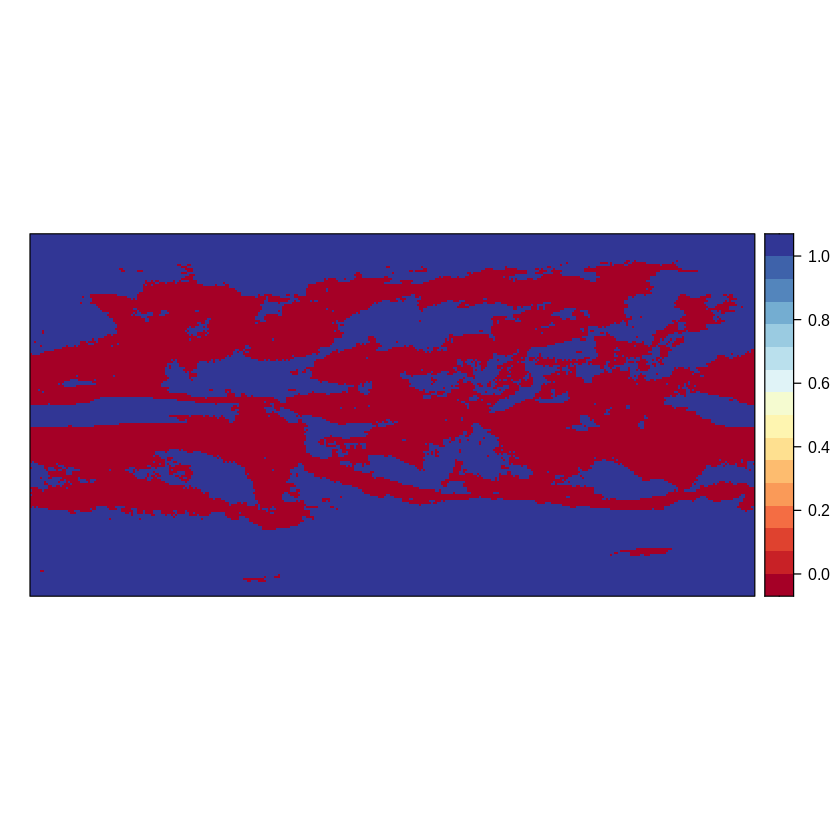

In [16]:
simple <- aggregateGrid(delta, aggr.mem = list(FUN = agreement, th = 80))
spatialPlot(simple)

[2024-04-17 11:28:21] - Computing climatology...



[2024-04-17 11:28:22] - Done.



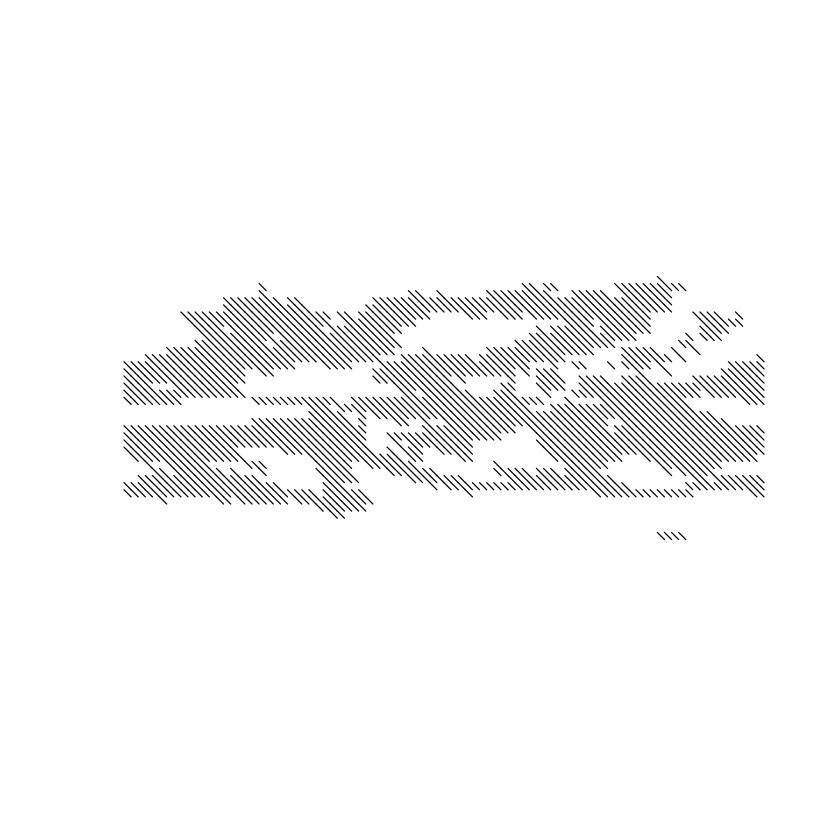

In [17]:
simple.hatch <- map.hatching(clim = climatology(simple), threshold = "0.5", angle = "-45",
                             condition = "LT", density = 4,  lwd = 0.6,
                             upscaling.aggr.fun = list(FUN = mean))
plot(simple.hatch[[2]])

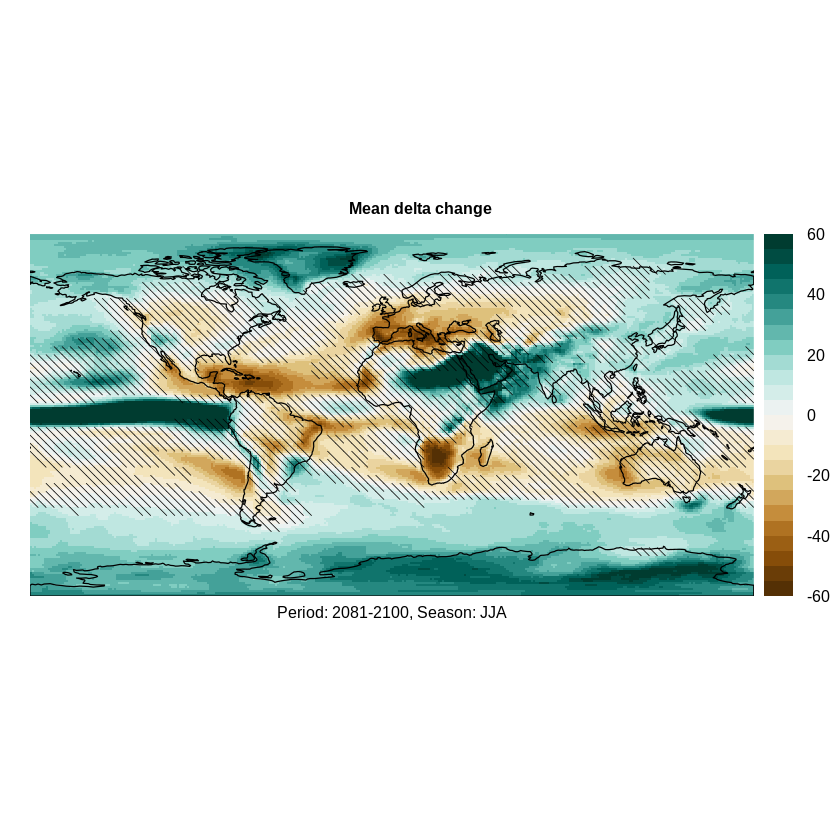

In [18]:
pl.simple <- spatialPlot(rel.delta, 
            color.theme = "BrBG", 
            at = seq(-60, 60, 5), 
            set.max = 60, set.min = -60,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list("Period: 2081-2100, Season: JJA", cex = 0.8),
            sp.layout = list(simple.hatch),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.simple

In [19]:
sign <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100_signal.nc", var = "pr_signal")

[2024-04-17 11:28:24] Defining geo-location parameters



[2024-04-17 11:28:24] Defining time selection parameters



[2024-04-17 11:28:24] Retrieving data subset ...



[2024-04-17 11:28:24] Done



In [20]:
advanced1 <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens1, th = 66))

[2024-04-17 11:28:24] - Aggregating members...



[2024-04-17 11:28:24] - Done.



In [21]:
advanced2.aux <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens2, th = 66))

[2024-04-17 11:28:24] - Aggregating members...



[2024-04-17 11:28:24] - Done.



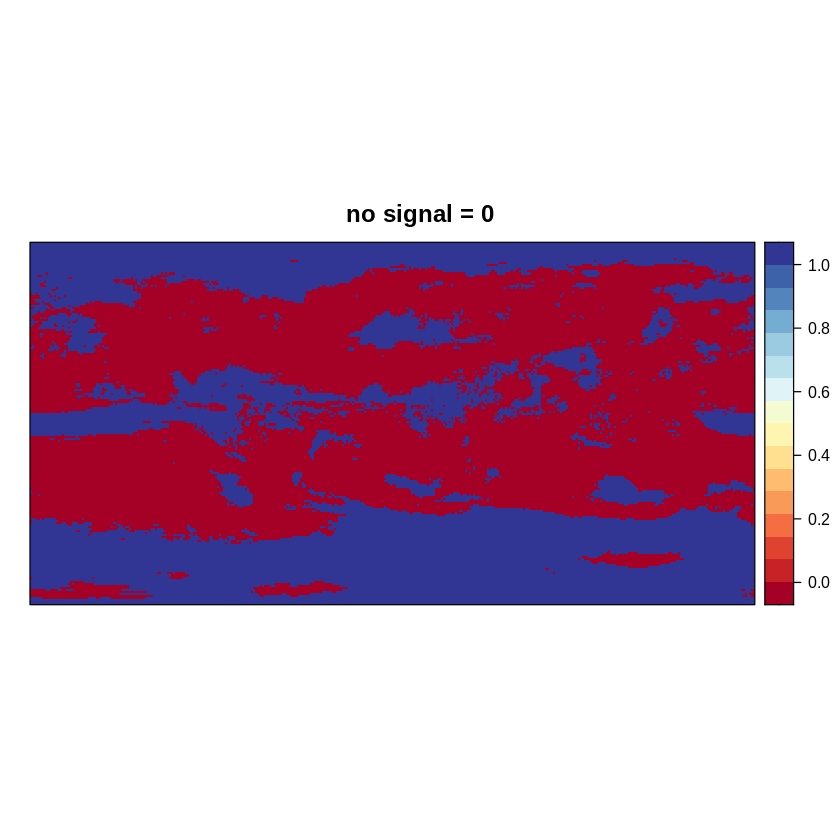

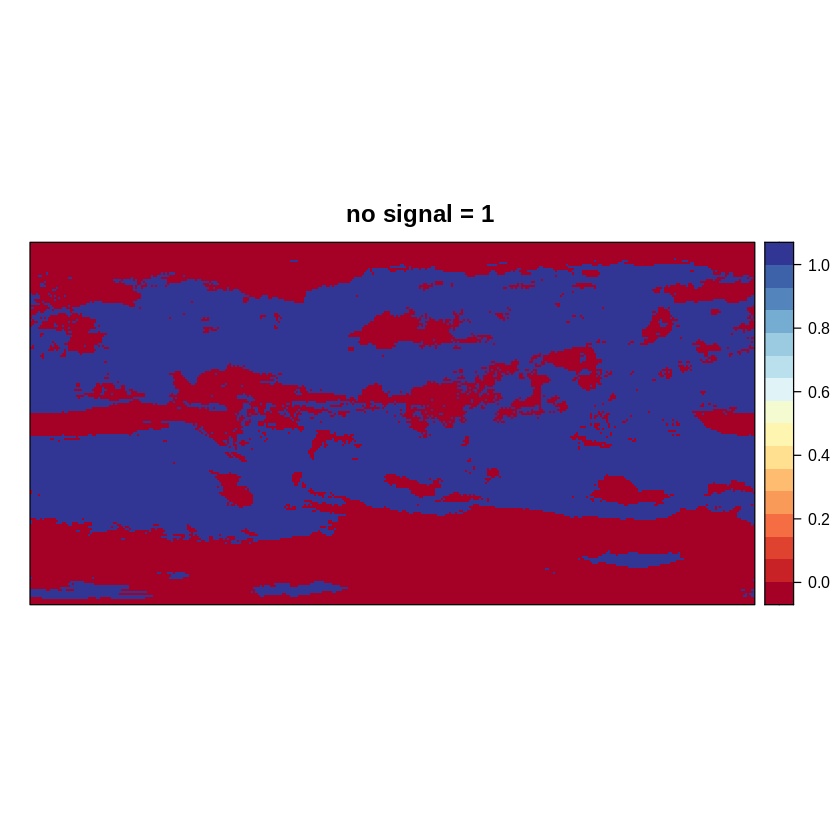

In [22]:
spatialPlot(advanced1, main = "no signal = 0")
spatialPlot(advanced2.aux, main = "no signal = 1")

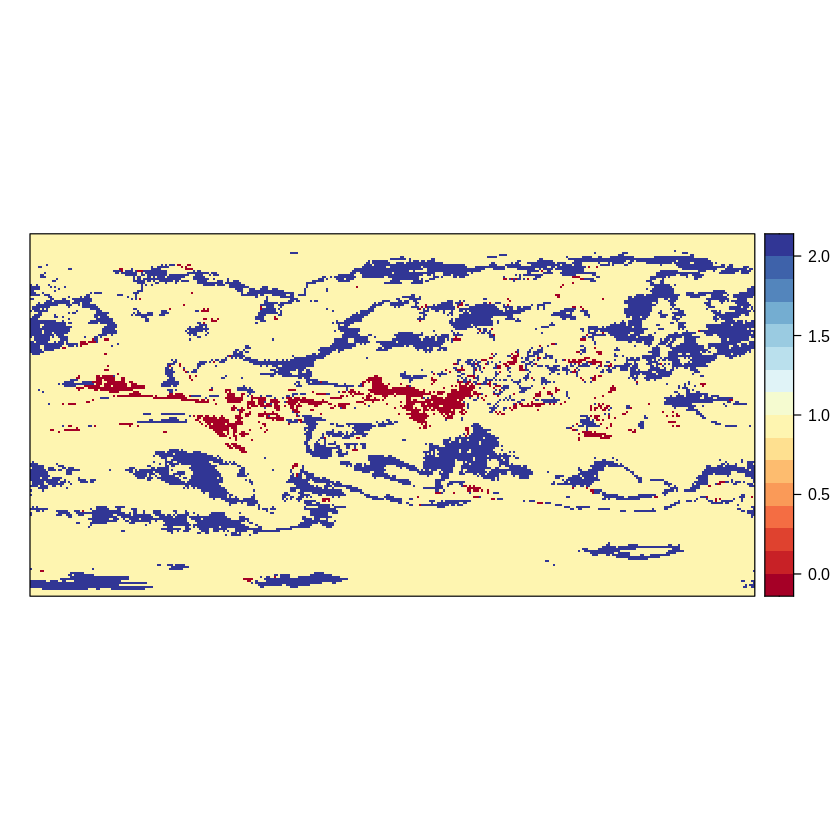

In [23]:
advanced2.aux <- gridArithmetics(advanced2.aux, simple, operator = "+") 
spatialPlot(advanced2.aux)

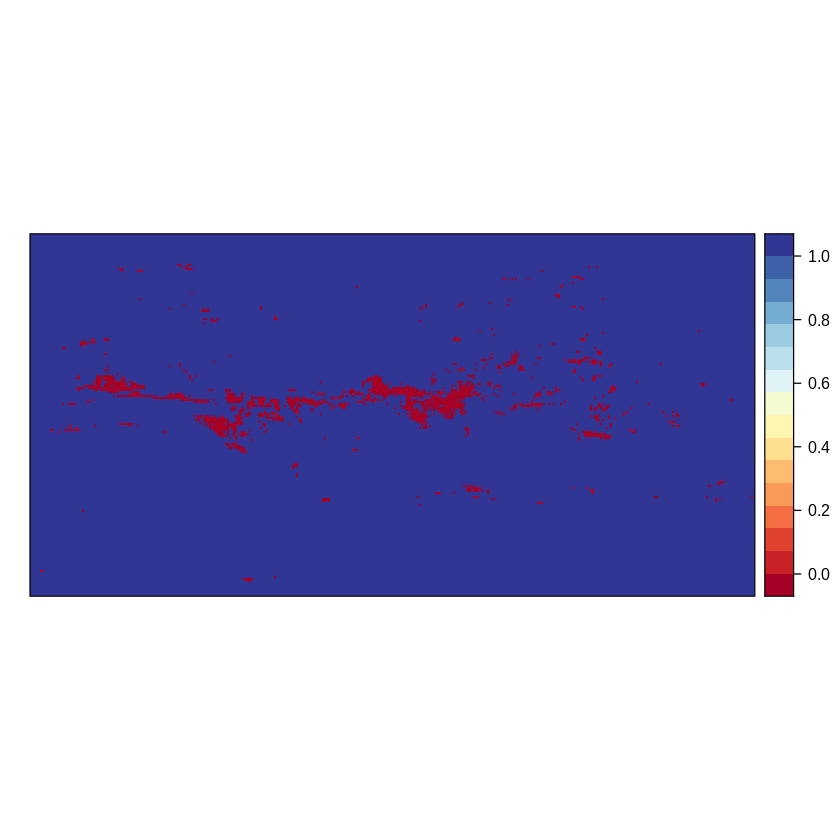

In [24]:
advanced2 <- binaryGrid(advanced2.aux, condition = "GT", threshold = 0)
spatialPlot(advanced2)


In [25]:
my.hatching <- function(grid, angle) map.hatching(grid, threshold = 0.8, angle = angle,
                                       condition = "LT", density = 4,  lwd = 0.6,
                                       upscaling.aggr.fun = list(FUN = mean))
advanced1.hatch <- my.hatching(climatology(advanced1), "-45")
advanced2.hatch <- my.hatching(climatology(advanced2),  "45")
advanced2.hatch.bis <- my.hatching(climatology(advanced2), "-45")

[2024-04-17 11:28:25] - Computing climatology...



[2024-04-17 11:28:26] - Done.



[2024-04-17 11:28:27] - Computing climatology...



[2024-04-17 11:28:27] - Done.



[2024-04-17 11:28:27] - Computing climatology...



[2024-04-17 11:28:27] - Done.



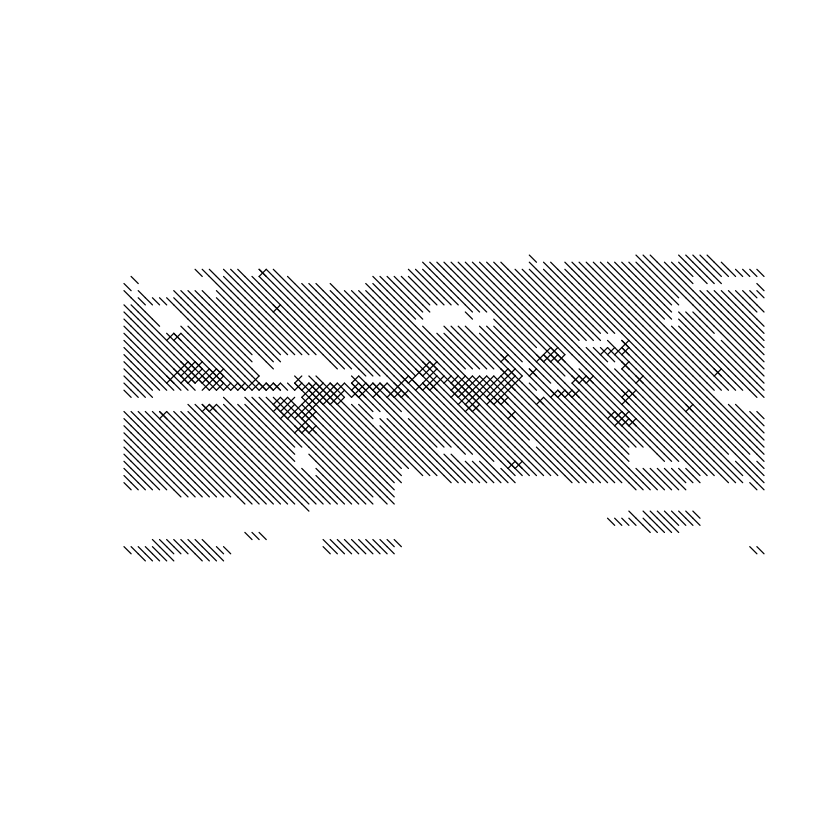

In [26]:
plot(advanced1.hatch[[2]])
plot(advanced2.hatch[[2]], add = TRUE)
plot(advanced2.hatch.bis[[2]], add = TRUE)

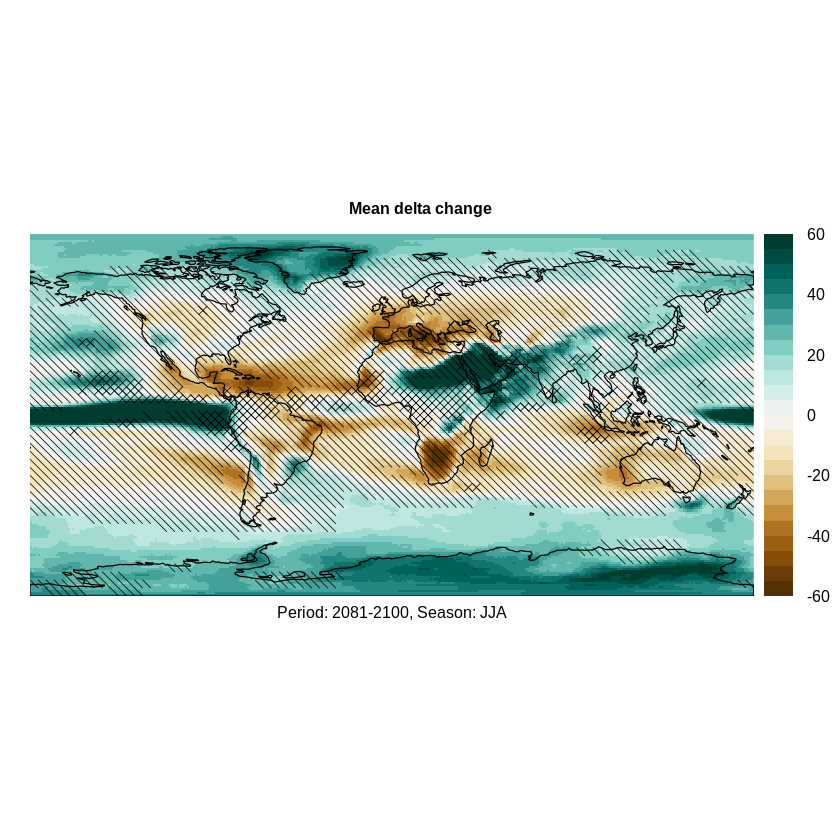

In [27]:
pl.advanced <- spatialPlot(rel.delta, 
            color.theme = "BrBG", 
            at = seq(-60, 60, 5), 
            set.max = 60, set.min = -60,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list("Period: 2081-2100, Season: JJA", cex = 0.8),
            sp.layout = list(advanced1.hatch, advanced2.hatch, advanced2.hatch.bis),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.advanced

In [28]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /DATA/miniconda3/envs/atlas-jupyterbook/lib/libopenblasp-r0.3.25.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.4-5            visualizeR_1.6.1    transformeR_2.1.3  
[4] loadeR_1.7.1        climate4R.UDG_0.2.3 loadeR.java_1.1.1  
[7] rJava_1.0-4        

loaded via a namespace (and not attached):
 [1] viridis_0.6.1           maps_3.3.0              jsonlite_1.7.2 